In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Merge files and drop duplictes 



In [ ]:
import pandas as pd

In [ ]:
dfs = []
vinted_data = '/content/drive/My Drive/FYDP/Prototype - I1/vinted_data.csv'
frame = pd.read_csv(vinted_data)
dfs.append(frame)

import glob
path_add_data = r'/content/drive/My Drive/FYDP/Prototype - I1/Additional data'
all_files = glob.glob(path_add_data + "/*.csv")

for filename in all_files:
    frame = pd.read_csv(filename)
    dfs.append(frame)

df = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
df = df.sort_values(by=['product-link-href'])
print(df.info())
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 974 to 7214
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      10034 non-null  object
 1   web-scraper-start-url  10034 non-null  object
 2   product-link           1 non-null      object
 3   product-link-href      10034 non-null  object
 4   title                  10034 non-null  object
 5   brand                  9740 non-null   object
 6   price                  10034 non-null  object
 7   size                   9982 non-null   object
 8   condition              10034 non-null  object
 9   colour                 10034 non-null  object
 10  category-1             10034 non-null  object
 11  category-2             10032 non-null  object
 12  category-3             9758 non-null   object
 13  category-4             2895 non-null   object
 14  category               10034 non-null  object
dtypes: object(15)
memo

web-scraper-order        10034
web-scraper-start-url      429
product-link                 1
product-link-href         8775
title                     8178
brand                     1938
price                      316
size                        69
condition                    5
colour                     286
category-1                  21
category-2                 195
category-3                3654
category-4                1719
category                     4
dtype: int64

In [ ]:
# drop unncessary columns
drop_cols = ['web-scraper-order','web-scraper-start-url', 'product-link', \
             'category-4', 'category-3', 'category-2', 'title']

# drop 'product-link-href' later as it will be used to find duplicates
df = df.drop(columns = drop_cols)
print(df.shape)

df = df.rename(columns={"category": "gender"})
df['gender'] = df['gender'].str.lower()
df['price'] = df['price'].str.replace('$', '').str.replace(',', '') # remove any non digit characters
df['price'] = df['price'].astype(float) # convert to decimal
list(df.columns)

(10034, 8)


['product-link-href',
 'brand',
 'price',
 'size',
 'condition',
 'colour',
 'category-1',
 'gender']

In [ ]:
print(df[df.duplicated(subset = ['product-link-href', 'brand'],keep=False)])#.sort_values(by=['product-link-href']) 
# There are 2360 duplicates, but some items are repeated 3 times
df = df.drop_duplicates(subset=['product-link-href']) # there are 8775 unique product-link-href as listed in the earlier cell
df = df.drop(columns=['product-link-href']) 
print(df.shape) # should return (8775, 7)
# Write merged file to google drive
df.to_csv('merged_data.csv', index=False)
!cp merged_data.csv "drive/My Drive/FYDP/Prototype - I1/"

                                      product-link-href  ... gender
3615  https://www.vinted.com/men/bomber-jackets/2823...  ...    men
6609  https://www.vinted.com/men/bomber-jackets/2823...  ...    men
6588  https://www.vinted.com/men/bomber-jackets/2823...  ...    men
4495  https://www.vinted.com/men/bomber-jackets/2823...  ...    men
6499  https://www.vinted.com/men/bomber-jackets/2824...  ...    men
...                                                 ...  ...    ...
1156  https://www.vinted.com/women/winter-coats/2828...  ...  women
405   https://www.vinted.com/women/winter-coats/2828...  ...  women
6287  https://www.vinted.com/women/winter-coats/2828...  ...  women
6114  https://www.vinted.com/women/winter-coats/2829...  ...  women
612   https://www.vinted.com/women/winter-coats/2829...  ...  women

[2360 rows x 8 columns]
(8775, 7)


# Clean merged data and output model file

In [ ]:
import pandas as pd
merged_file = '/content/drive/My Drive/FYDP/Prototype - I1/merged_data.csv'
df = pd.read_csv(merged_file)
print(df.head())
print(df.shape)

# percentage of nulls in the table
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['null'])
sum_tot = len(df)
null_values['percent'] = round(null_values['null']/sum_tot*100, 3)
null_values['unique'] = df.nunique()
null_values.sort_values('percent', ascending=False)

          brand  price size      condition       colour category-1 gender
0           DAY   20.0  NaN  New with tags  black, blue      Other  women
1  Under Armour   10.0  NaN  New with tags        black      Other  women
2     hyperknit    6.0  NaN  New with tags          red      Other  women
3       Raiders   25.0  NaN  New with tags        black      Other  women
4        Schutt   30.0  NaN  New with tags   red, white      Other  women
(8775, 7)


,null,percent,unique
brand,258,2.940,1938
size,39,0.444,69
price,0,0.000,233
condition,0,0.000,5
colour,0,0.000,286
category-1,0,0.000,21
gender,0,0.000,2


In [ ]:
columns = ['colour', 'size', 'brand','category-1','condition',]
#for cols in df.columns:
for cols in columns:
  print(cols, df[cols].nunique())

colour 286
size 69
brand 1938
category-1 21
condition 5


In [ ]:
# colour
df['colour'] = df['colour'].str.split(',').str[0]
#print(df['colour'].value_counts())

df['colour'] = df['colour'].replace(['navy','turquoise','light blue', 'dark blue'],'blue')
df['colour'] = df['colour'].replace(['dark green','mint','light green'],'green')
df['colour'] = df['colour'].replace(['khaki'],'brown')
df['colour'] = df['colour'].replace(['apricot', 'coral'],'orange')
df['colour'] = df['colour'].replace(['mustard'],'yellow')
df['colour'] = df['colour'].replace(['burgundy'],'red')
df['colour'] = df['colour'].replace(['rose'],'pink')
df['colour'] = df['colour'].replace(['lilac'],'purple')
df['colour'] = df['colour'].replace(['cream','gold','silver', 'various'],'other')
print(df['colour'].value_counts())

black     2437
blue      1850
gray       951
red        601
white      421
pink       420
green      411
brown      403
other      381
beige      330
purple     217
yellow     188
orange     165
Name: colour, dtype: int64


In [ ]:
# sizes - we'll only keep S, M, L
df['size'] = df['size'].fillna('Other')

df.loc[df['size'].str.contains('S', case=False), 'size'] = 'S'
df.loc[df['size'].str.contains('petite', case=False), 'size'] = 'S'
df.loc[df['size'].str.contains('M', case=False), 'size'] = 'M'
df.loc[df['size'].str.contains('L', case=False), 'size'] = 'L'
df.loc[df['size'].str.contains('X', case=False), 'size'] = 'L'

all_sizes = df['size'].unique().tolist()
wanted_sizes = ['S', 'M', 'L']
unwanted_sizes = list(set(all_sizes).difference(set(wanted_sizes)))
df['size'] = df['size'].replace({x:'Other' for x in unwanted_sizes}) 
df.drop(df.loc[df['size']=='Other'].index, inplace=True)

df['size'].value_counts()

S    3324
L    2954
M    2332
Name: size, dtype: int64

In [ ]:
# brand
df['brand'] = df['brand'].fillna('Other')

val = df['brand'].value_counts()
y = val[val < 20].index
df['brand'] = df['brand'].replace({x:'Other' for x in y})
# df['brand'].value_counts()
df['brand'].value_counts().nlargest(15)

Other                        4179
UNKNOWN                       542
Forever 21                    255
Nike                          240
Vintage                       221
Old Navy                      170
American Eagle                146
Levi's                        139
Adidas                        125
H&M                           123
Pink                          105
Free People                    92
American Eagle Outfitters      92
Zara                           89
EXPRESS                        87
Name: brand, dtype: int64

In [ ]:
df.shape

(8610, 7)

(0.0, 100.9]       8105
(100.9, 200.8]      113
(200.8, 300.7]       18
(300.7, 400.6]        8
(400.6, 500.5]        2
(500.5, 600.4]        3
(600.4, 700.3]        3
(700.3, 800.2]        2
(800.2, 900.1]        1
(900.1, 1000.0]       6
Name: price, dtype: int64


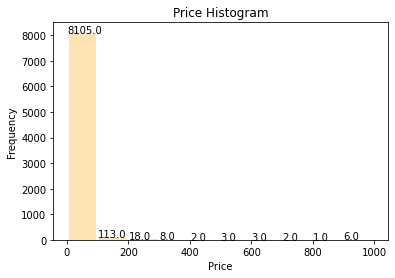

In [ ]:
import matplotlib.pyplot as plt

print(df['price'].value_counts(bins=10, sort=False))
data = df['price']
arr=plt.hist(data,rwidth=0.9,alpha=0.3,color='orange',bins=10)
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.title('Price Histogram')
plt.show()
df.drop(df.loc[(df['price'] > 100 )].index, inplace=True)

In [ ]:
print(df['price'].value_counts(bins=10, sort=False))

(0.9, 10.9]      3509
(10.9, 20.8]     2449
(20.8, 30.7]      977
(30.7, 40.6]      450
(40.6, 50.5]      296
(50.5, 60.4]      149
(60.4, 70.3]       92
(70.3, 80.2]       63
(80.2, 90.1]       43
(90.1, 100.0]      77
Name: price, dtype: int64


In [ ]:
con = df['condition'].unique().tolist()
#con.sort()
info = []
for i in con:
  info.append([i, df['price'][df['condition'] == i].mean()])
info

[['New without tags', 20.026775431861804],
 ['Very good', 16.623683651804672],
 ['Satisfactory', 14.398055555555556],
 ['Good', 14.516521739130432],
 ['New with tags', 28.150671641791057]]

In [ ]:
df['condition'].value_counts()

Very good           4710
Good                1173
New with tags       1072
New without tags    1042
Satisfactory         108
Name: condition, dtype: int64

In [ ]:
# category 1

df['category-1'] = df['category-1'].replace(['Pants & leggings'], 'Pants') 
df['category-1'] = df['category-1'].replace(['Shorts & capri pants'], 'Shorts') 

val = df['category-1'].value_counts()
ind = val[val < 400].index # any clothing category that appears less than 400 times is replaced with Other
df['category-1'] = df['category-1'].replace({x:'Other' for x in ind})
df.drop(df.loc[df['category-1'] == 'Other'].index, inplace=True)
df['category-1'].value_counts()

Tops & t-shirts    1929
Coats & jackets    1132
Sweaters           1131
Dresses             994
Shorts              974
Pants               713
Activewear          644
Jeans               588
Name: category-1, dtype: int64

In [ ]:
df.to_csv('model_data.csv', index=False)
!cp model_data.csv "drive/My Drive/FYDP/Prototype - I1/"

In [ ]:
print(df.head())
print(df.shape)

           brand  price size         condition colour       category-1 gender
9         Pacsun   15.0    S  New without tags  black  Coats & jackets    men
10         Other   80.0    L         Very good  black  Coats & jackets    men
11    Forever 21   15.0    M         Very good  brown  Coats & jackets    men
12       UNKNOWN   30.0    L         Very good  green  Coats & jackets    men
13  Michael Kors   60.0    L  New without tags  black  Coats & jackets    men
(8105, 7)


# Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.DataFrame(data=df[df['price'] <= 100])

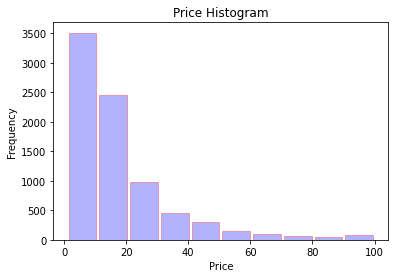

In [ ]:
# PRICE HISTOGRAM
plt.hist(df1['price'],rwidth=0.9,alpha=0.3,color='blue',bins=10,edgecolor='red') 
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.title('Price Histogram')
plt.show()

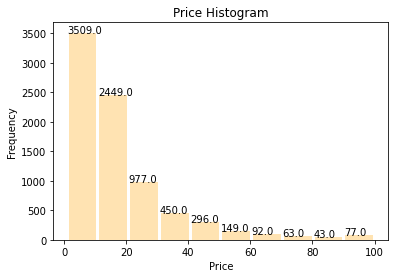

In [ ]:
data1 = df1['price']

arr=plt.hist(data1,rwidth=0.9,alpha=0.3,color='orange',bins=10)
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.title('Price Histogram')
plt.show()

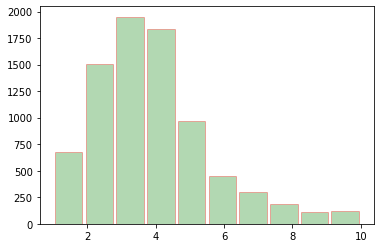

In [ ]:
# Attempt at transformation to normalize
import math
df1['price_sqrt'] = df1['price']**0.5
plt.hist(df1['price_sqrt'],rwidth=0.9,alpha=0.3,color='green',bins=10,edgecolor='red') 
plt.show()
# Taking a square root of the plot helps to normalize data to use One-way ANOVA
# However this yielded similar results to Kruskal Wallis so we will just proceed with regular price histogram
# TLDR - Ignore

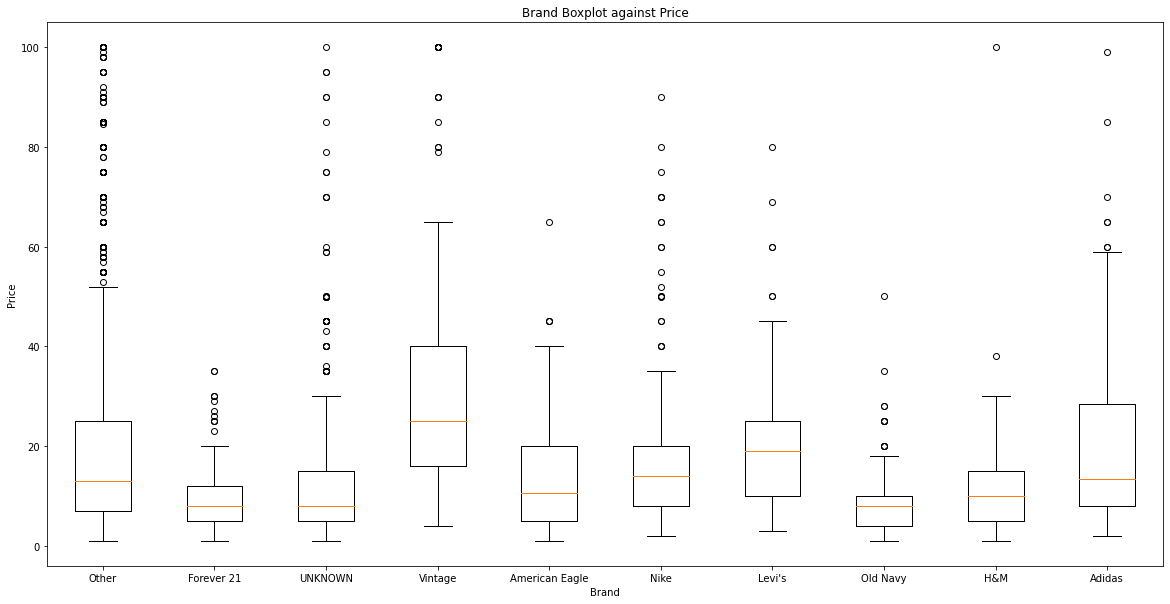

In [ ]:
# PRICE VS BRAND BOXPLOT

# Slice df depending on most common 
topX = 10
allBrand = df1['brand'].value_counts().index.tolist() # colour list in descending order of freq
selBrand = allBrand[0:topX]

brandDf = df1[df1['brand'].isin(selBrand)] # new df with only top X colours

brnd = {}
for i in brandDf['brand'].unique():
    brnd[i] = brandDf[brandDf['brand'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in brnd.values()],labels=[x for x in brnd.keys()])
plt.xlabel('Brand') 
plt.ylabel('Price') 
plt.title('Brand Boxplot against Price')
plt.show()

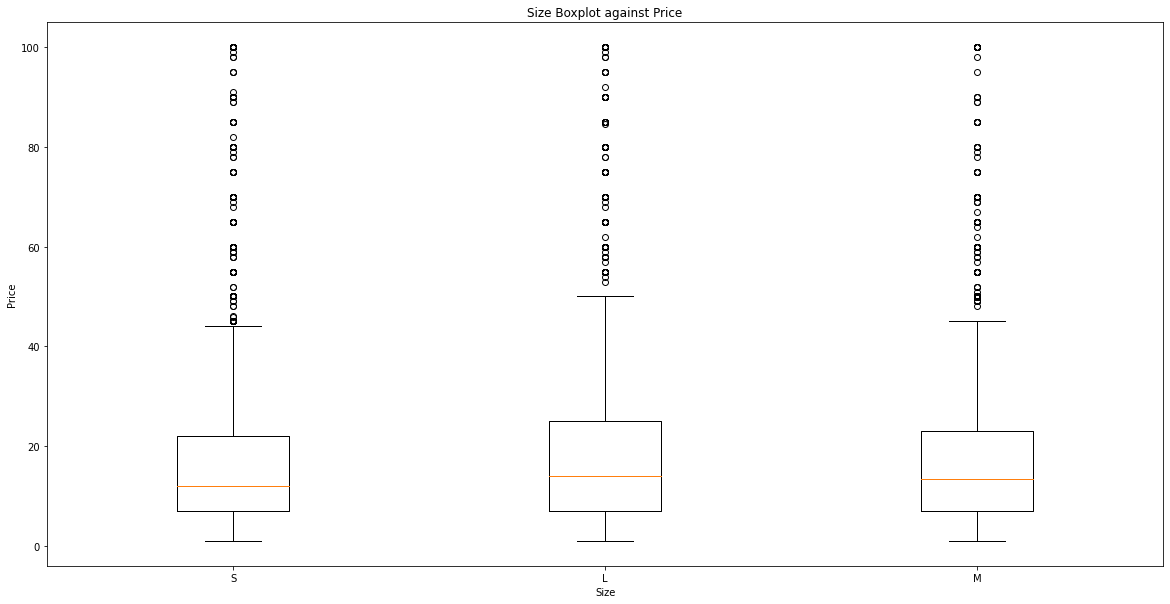

In [ ]:
# PRICE VS SIZE BOXPLOT

siz = {}
for i in df1['size'].unique():
    siz[i] = df1[df1['size'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in siz.values()],labels=[x for x in siz.keys()])
plt.xlabel('Size') 
plt.ylabel('Price') 
plt.title('Size Boxplot against Price')

plt.show()

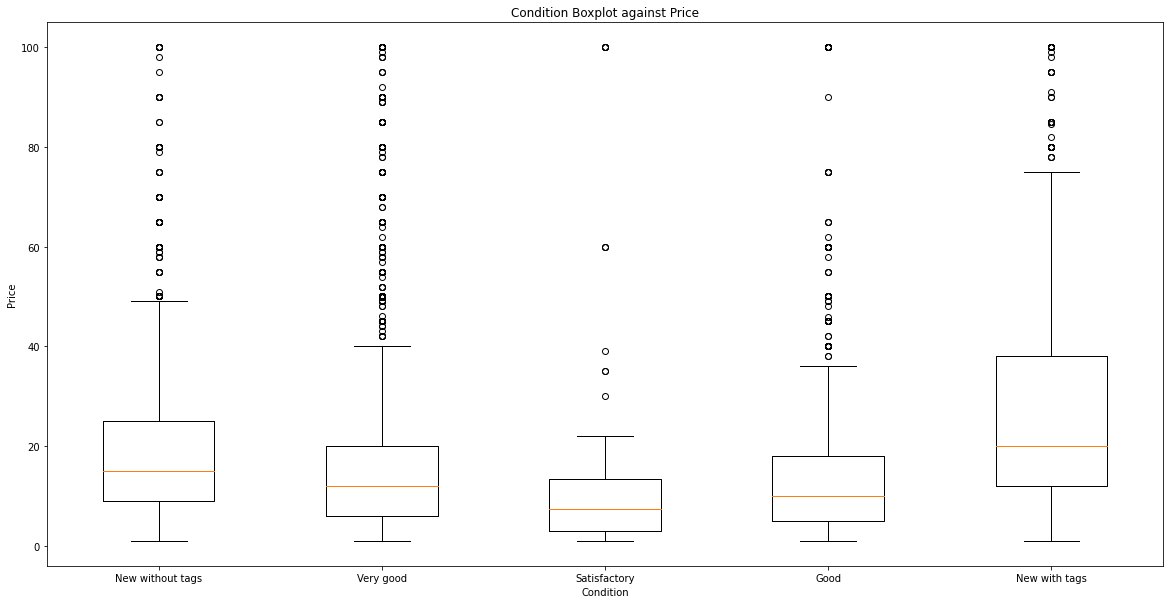

In [ ]:
#  PRICE VS CONDITION BOXPLOT

condition = {}
for i in df1['condition'].unique():
    condition[i] = df1[df1['condition'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in condition.values()],labels=[x for x in condition.keys()])
plt.xlabel('Condition') 
plt.ylabel('Price') 
plt.title('Condition Boxplot against Price')
plt.show()

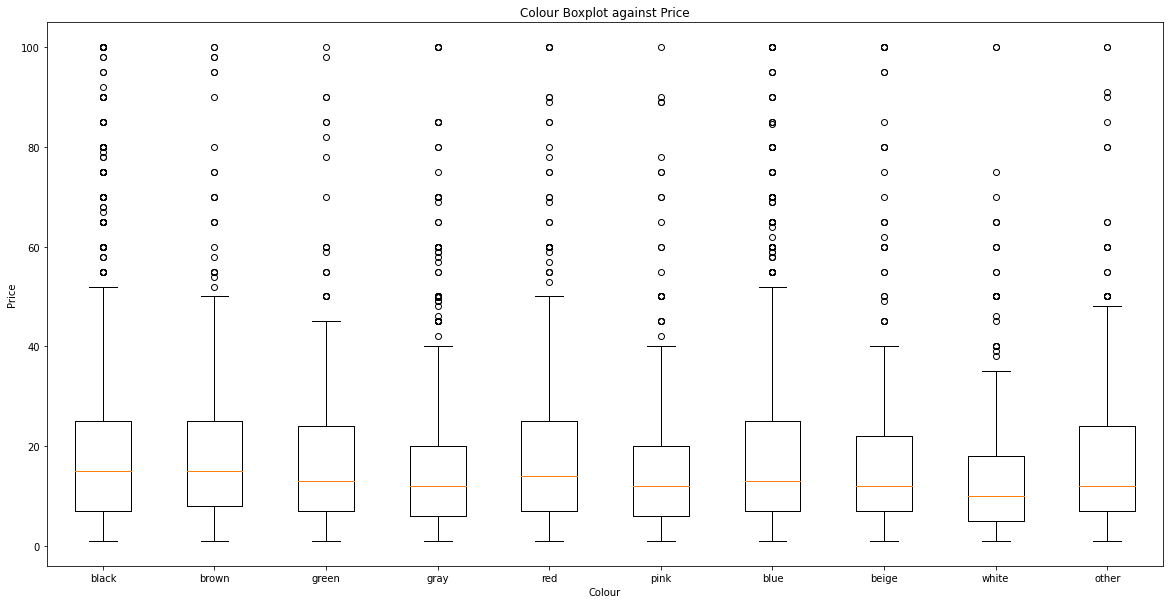

In [ ]:
# PRICE VS COLOUR BOXPLOT

# Slice df depending on most common 
topX = 10
allCol = df1['colour'].value_counts().index.tolist() # colour list in descending order of freq
selCol = allCol[0:topX]

colDf = df1[df1['colour'].isin(selCol)] # new df with only top X colours

colr = {}
for i in colDf['colour'].unique():
    colr[i] = colDf[colDf['colour'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in colr.values()],labels=[x for x in colr.keys()])
plt.xlabel('Colour') 
plt.ylabel('Price') 
plt.title('Colour Boxplot against Price')
plt.show()


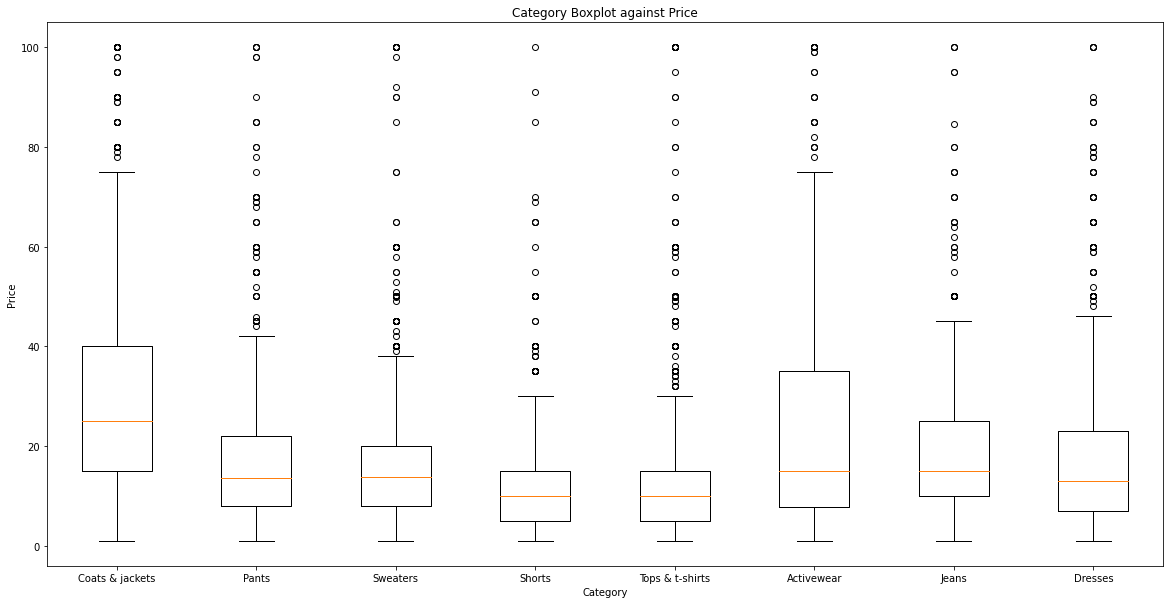

In [ ]:
# PRICE VS CATEGORY BOXPLOT

# Slice df depending on most common 
topX = 8
allCategory = df1['category-1'].value_counts().index.tolist() # colour list in descending order of freq
selCategory = allCategory[0:topX]
catDf = df1[df1['category-1'].isin(selCategory)] # new df with only top X colours

categ = {}
for i in catDf['category-1'].unique():
    categ[i] = catDf[catDf['category-1'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in categ.values()],labels=[x for x in categ.keys()])
plt.xlabel('Category') 
plt.ylabel('Price') 
plt.title('Category Boxplot against Price')
plt.show()

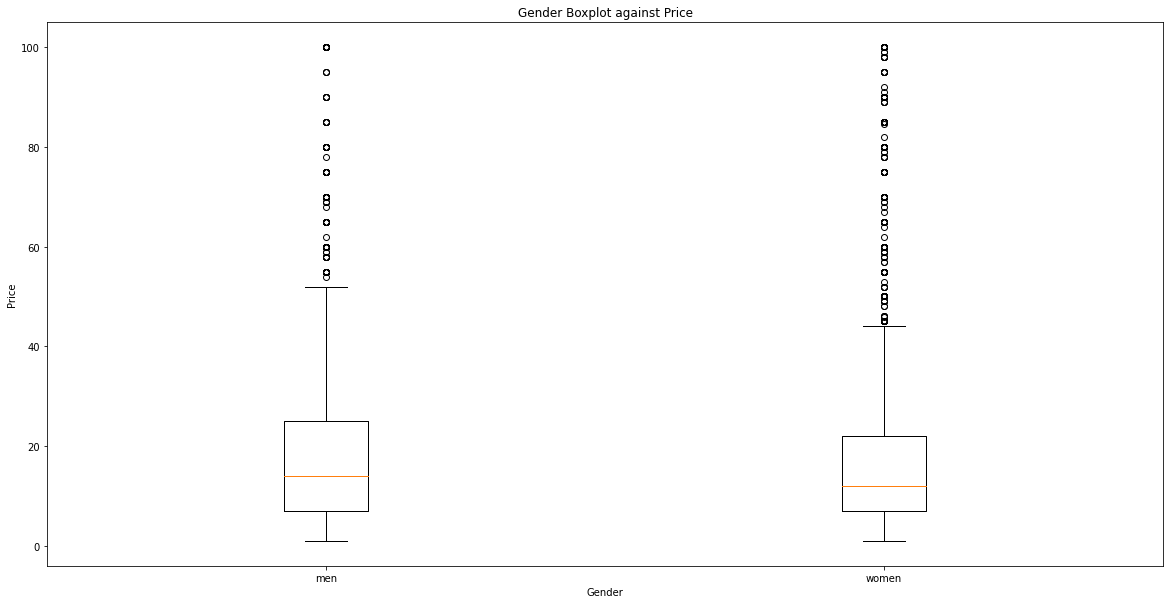

In [ ]:
# PRICE VS GENDER BOXPLOT

gend = {}
for i in df1['gender'].unique():
    gend[i] = df1[df1['gender'] == i].price

plt.figure(figsize=(20,10))
plt.boxplot([x for x in gend.values()],labels=[x for x in gend.keys()])
plt.xlabel('Gender') 
plt.ylabel('Price') 
plt.title('Gender Boxplot against Price')

plt.show()

# Test & Hypothesis

In [ ]:
# percentage of nulls in the table
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['null'])
sum_tot = len(df)
null_values['percent'] = round(null_values['null']/sum_tot*100, 3)
null_values.sort_values('percent', ascending=False)

,null,percent
brand,0,0.0
price,0,0.0
size,0,0.0
condition,0,0.0
colour,0,0.0
category-1,0,0.0
gender,0,0.0


General procedure for analysis is as follows. To analyze whether the means of an independent variable (with multiple levels) is significantly different, several teste are available. If 1 - normality, and 2 - homogenity of variances are met, use One-way Anova. If only 2 is met, use Kruskal Wallis. If neither are met, use Welch's ANOVA.

In [ ]:
# Check homogenity of variance
from scipy.stats import levene
from tabulate import tabulate

# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

varTable = []

# Brand
levstat_brand, levp_brand = levene(df1['price'][df1['brand'] == selBrand[0]],
                      df1['price'][df1['brand'] == selBrand[1]],
                       df1['price'][df1['brand'] == selBrand[3]],
                       df1['price'][df1['brand'] == selBrand[4]],
                       df1['price'][df1['brand'] == selBrand[5]],
                       df1['price'][df1['brand'] == selBrand[6]],
                       df1['price'][df1['brand'] == selBrand[7]],
                       df1['price'][df1['brand'] == selBrand[8]],
                       df1['price'][df1['brand'] == selBrand[9]] )
print("Brand P-Value:", levp_brand)

if levp_brand < 0.05:
    brandVarRes = "Reject NULL hypothesis - Unequal variances."
if levp_brand > 0.05:
    brandVarRes = "Accept NULL hypothesis - Equal variances."
varTable.append(['brand', levp_brand, brandVarRes])

# size
levstat_size, levp_size = levene(df1['price'][df1['size'] == 'S'],
                                df1['price'][df1['size'] == 'M'],
                                df1['price'][df1['size'] == 'L'])
print("P-Value:", levp_size)

if levp_size < 0.05:
    sizeVarRes = "Reject NULL hypothesis - Unequal variances."
if levp_size > 0.05:
    sizeVarRes = "Accept NULL hypothesis - Equal variances."

varTable.append(['size', levp_size, sizeVarRes])

# condition
levstat_cond, levp_cond = levene(df1['price'][df1['condition'] == 'New with tags'],
                      df1['price'][df1['condition'] == 'New without tags'],
                      df1['price'][df1['condition'] == 'Very good'],
                      df1['price'][df1['condition'] == 'Good'],
                      df1['price'][df1['condition'] == 'Satisfactory'])
print("P-Value:", levp_cond)

if levp_cond < 0.05:
    condVarRes = "Reject NULL hypothesis - Unequal variances."
if levp_cond > 0.05:
    condVarRes = "Accept NULL hypothesis - Equal variances."

varTable.append(['cond', levp_cond, condVarRes])

# colour
levstat_colr, levp_colr = levene(df1['price'][df1['colour'] == selCol[0]],
                      df1['price'][df1['colour'] == selCol[1]],
                       df1['price'][df1['colour'] == selCol[3]],
                       df1['price'][df1['colour'] == selCol[4]],
                       df1['price'][df1['colour'] == selCol[5]],
                       df1['price'][df1['colour'] == selCol[6]],
                       df1['price'][df1['colour'] == selCol[7]],
                       df1['price'][df1['colour'] == selCol[8]],
                       df1['price'][df1['colour'] == selCol[9]])
print("P-Value:", levp_colr)

if levp_colr < 0.05:
    colrVarRes = "Reject NULL hypothesis - Unequal variances."
if levp_colr > 0.05:
    colrVarRes = "Accept NULL hypothesis - Equal variances."

varTable.append(['colr', levp_colr, colrVarRes])

# category-1
levstat_cat1, levp_cat1 = levene(df1['price'][df1['category-1'] == selCategory[0]],
                      df1['price'][df1['category-1'] == selCategory[1]],
                       df1['price'][df1['category-1'] == selCategory[3]],
                       df1['price'][df1['category-1'] == selCategory[4]],
                       df1['price'][df1['category-1'] == selCategory[5]],
                       df1['price'][df1['category-1'] == selCategory[6]],
                       df1['price'][df1['category-1'] == selCategory[7]])
print("P-Value:", levp_cat1)

if levp_cat1 < 0.05:
    cat1VarRes = "Reject NULL hypothesis - Unequal variances."
if levp_cat1 > 0.05:
    cat1VarRes = "Accept NULL hypothesis - Equal variances."

varTable.append(['category-1', levp_cat1, cat1VarRes])

# gender
levstat_gend, levp_gend = levene(df1['price'][df1['gender'] == 'men'],
                            df1['price'][df1['gender'] == 'women'])
print("P-Value:", levp_gend)

if levp_gend < 0.05:
    gendVarRes = "Reject NULL hypothesis - Unequal variances."
if levp_gend > 0.05:
    gendVarRes = "Accept NULL hypothesis - Equal variances."

varTable.append(['gender', levp_gend, gendVarRes])

print(tabulate(varTable, headers = ['Independent Variable', 'p-value', 'Variance Result']), "\n")

Brand P-Value: 8.00472553483945e-20
P-Value: 0.043551975527077055
P-Value: 8.1983204286028e-31
P-Value: 0.008118926669085796
P-Value: 3.4570066710771344e-105
P-Value: 0.0009160952990921835
Independent Variable         p-value  Variance Result
----------------------  ------------  -------------------------------------------
brand                   8.00473e-20   Reject NULL hypothesis - Unequal variances.
size                    0.043552      Reject NULL hypothesis - Unequal variances.
cond                    8.19832e-31   Reject NULL hypothesis - Unequal variances.
colr                    0.00811893    Reject NULL hypothesis - Unequal variances.
category-1              3.45701e-105  Reject NULL hypothesis - Unequal variances.
gender                  0.000916095   Reject NULL hypothesis - Unequal variances. 



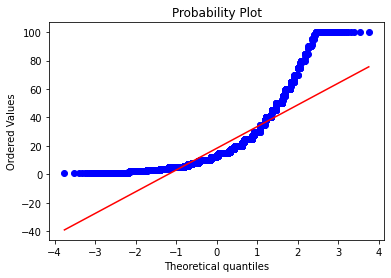

In [ ]:
# Check normality 
from scipy import stats
import matplotlib.pyplot as plt
import pylab 

stats.probplot(df1['price'], dist="norm", plot=pylab)
pylab.show()

How to interpret QQ plot: https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html

Thus both the normality and homogenity assumptions are violated for all variables except size. Welch's ANOVA test should be used. 

In [ ]:
# OG at: https://github.com/scipy/scipy/issues/11122
def welch_anova_np(*args, var_equal=False):
    from scipy import special
    import collections
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = collections.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni =np.array([len(arg) for arg in args])
    mi =np.array([np.mean(arg) for arg in args])
    vi =np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = special.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [ ]:
# Summarize results in statsTable
import numpy as np
indVar = ['brand', 'size', 'condition', 'colour', 'category-1', 'gender']
numRows = len(indVar)
depVar = ['price']*numRows

alpha = 0.05
statsTable = []

# Brand
branTest = welch_anova_np(df1['price'][df1['brand'] == selBrand[0]],
                      df1['price'][df1['brand'] == selBrand[1]],
                       df1['price'][df1['brand'] == selBrand[3]],
                       df1['price'][df1['brand'] == selBrand[4]],
                       df1['price'][df1['brand'] == selBrand[5]],
                       df1['price'][df1['brand'] == selBrand[6]],
                       df1['price'][df1['brand'] == selBrand[7]],
                       df1['price'][df1['brand'] == selBrand[8]],
                       df1['price'][df1['brand'] == selBrand[9]])

if branTest[1] < alpha:
  branRes = 'Statistically Different'
else:
  branRes = 'Statistically Similar'

statsTable.append([indVar[0], branTest[1], branRes])

# Size
sizTest = stats.kruskal(df1['price'][df1['size'] == 'S'],
                      df1['price'][df1['size'] == 'M'],
                      df1['price'][df1['size'] == 'L'])
if sizTest[1] < alpha:
  sizRes = 'Statistically Different'  
else:
  sizRes = 'Statistically Similar'
statsTable.append([indVar[1], sizTest[1], sizRes])


# Condition
conTest = welch_anova_np(df1['price'][df1['condition'] == 'New with tags'],
                      df1['price'][df1['condition'] == 'New without tags'],
                      df1['price'][df1['condition'] == 'Very good'],
                      df1['price'][df1['condition'] == 'Good'],
                      df1['price'][df1['condition'] == 'Satisfactory'])
if conTest[1] < alpha:
  conRes = 'Statistically Different'  
else:
  conRes = 'Statistically Similar'
statsTable.append([indVar[2], conTest[1], conRes])

# Colour
colrTest = welch_anova_np(df1['price'][df1['colour'] == selCol[0]],
                      df1['price'][df1['colour'] == selCol[1]],
                       df1['price'][df1['colour'] == selCol[3]],
                       df1['price'][df1['colour'] == selCol[4]],
                       df1['price'][df1['colour'] == selCol[5]],
                       df1['price'][df1['colour'] == selCol[6]],
                       df1['price'][df1['colour'] == selCol[7]],
                       df1['price'][df1['colour'] == selCol[8]],
                       df1['price'][df1['colour'] == selCol[9]])

if colrTest[1] < alpha:
  colrRes = 'Statistically Different'  
else:
  colrRes = 'Statistically Similar'
statsTable.append([indVar[3], colrTest[1], colrRes])

# Category-1
catTest = welch_anova_np(df1['price'][df1['category-1'] == selCategory[0]],
                      df1['price'][df1['category-1'] == selCategory[1]],
                       df1['price'][df1['category-1'] == selCategory[3]],
                       df1['price'][df1['category-1'] == selCategory[4]],
                       df1['price'][df1['category-1'] == selCategory[5]],
                       df1['price'][df1['category-1'] == selCategory[6]],
                       df1['price'][df1['category-1'] == selCategory[7]])
if catTest[1] < alpha:
  catRes = 'Statistically Different'  
else:
  catRes = 'Statistically Similar'
statsTable.append([indVar[4], catTest[1], catRes])

# Gender
genTest = welch_anova_np(df1['price'][df1['gender'] == 'men'],
                      df1['price'][df1['gender'] == 'women'])

if genTest[1] < alpha:
  genRes = 'Statistically Different'  
else:
  genRes = 'Statistically Similar'
statsTable.append([indVar[5], genTest[1], genRes])

print(tabulate(statsTable, headers = ['Independent Variable', 'p-value', 'Result']), "\n")

Independent Variable         p-value  Result
----------------------  ------------  -----------------------
brand                   1.21813e-65   Statistically Different
size                    0.0916114     Statistically Similar
condition               6.11041e-60   Statistically Different
colour                  2.21357e-05   Statistically Different
category-1              3.82192e-156  Statistically Different
gender                  0.000694404   Statistically Different 



Based on results, brand, condition and category show evidence of significant differences in their means. Colour and gender also appear to affect price differently but by nowhere near as close. Size does not appear to be meaningful.

# Distribution Fit

Source code: https://github.com/samread81/Distribution-Fitting-Used_Car_Dataset/blob/master/Workbook.ipynb

In [ ]:
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = df1

In [ ]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    # y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [ ]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [ ]:
fit_distribution('price',0.99,0.01) # i.e. remove 1% of outliers on both ends

(1.056234804550547, -0.9930463001934385, 1.015439798297058)

(-5.610701429814487e-17, 1.0)

(0.573432975393999, 4.701402728818561, 1.4827786635409197)

(1.1581006671721998, 431947712280.9758, -0.9950471263466674, 371604978346.806)

(0.82277481155473, -1.1300460704774546, 1.3734595257692603)

(-0.9921215139475154, 5.693524242766076)

(0.8004957684883536, -0.9921215139475155, 1.1295173876801043)

(-0.9921215139475154, 0.9921215139475152)

(0.8570159343958828, -1.075074383180526, 0.7535027344776462)

(1.855345059292726, -2.2079858401248545e-17, 0.9231620964831959)

(9.195495791730679e-10, -0.9921215242628877, 5.756226837646661)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
8       lognorm       195.0
4      invgauss       218.0
9      pearson3       497.0
3          beta       505.0
0   weibull_min       761.0
7         expon      1279.0
6         gamma      4514.0
1          norm      6665.0
10       triang      7142

In [ ]:
y_std,len_y,y = standarise('price',0.99,0.01)

Text(0, 0.5, 'Frequency')

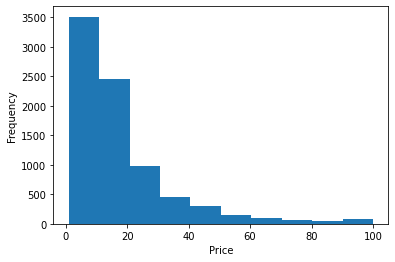

In [ ]:
plt.hist(y)
plt.xlabel('Price')
plt.ylabel('Frequency')

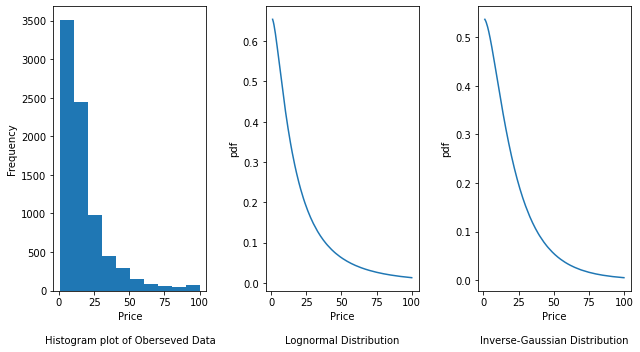

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,lognorm.pdf(y_std,1,-1.4))
axes[1].set_xlabel('Price\n\nLognormal Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,invgauss.pdf(y_std,0.45, -2,4))
axes[2].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()